Weak perturbation
=================

In this numerical experiment, one considers the propagation of a small perturbation in a collisionless plasma model. The perturbation is initiated by a thin slab of fluid slowly moving with respect to the surrounding resting fluid. The simulation domain is one-dimensional in the $x$ direction. The slab (we call it slab even if this term is inproper at one dimension) is also moving in the $x$ direction.

The perturbation is said to be **small** because the initial speed of the slab is small with respect to the ion acoustic speed. In such a case, the mode is linear and we aim in this practical work at calculating the speed at which this small perturbation is propagating and verify that it is the ion acoustic speed.

# Fluid case

## Theory

The one-dimensional ﬂuid equations, neglecting viscosity and conductivity are given by the continuity, momentum and energy equations ($\gamma$ is the polytropic)
\begin{eqnarray}
\partial_t n & = & - \partial_x (n u) \\
\partial_t u & = & - u \partial_x u - (1/n) \partial_x p \\
\partial_t p & = & -u \partial_x p - \gamma p \partial_x u \\
\end{eqnarray}

where $n$, $u$ and $p$ are the particle density, velocity component in the $x$ direction and fluid kinetic pressure, respectively.
Two modes in opposite directions exist which do satisfy $\partial_t u \pm c \partial_x u = 0$ propagating where $c =\sqrt{\gamma p_0/n_0 m} = \sqrt{\gamma T_0}$ is the sound speed, with $p_0$ and $n_0 m$ the average pressure and mass density, respectively.
The velocity, density and pressure ﬂuctuations associated with the two modes are related through $u/c = \pm n_1/n_0$ and $p_1/ p_0 = \gamma n_1/n_0$.
Note that in the code the normalized temperature is deﬁned as $T = p/n$.

# Hybrid case

In [1]:
import os
import sys

In [2]:
home = os.environ['HOME']
work_path = os.path.join(home, 'far/farTeach/2026/weak')
src_path = os.path.join(home, 'far/PHARE')
build_path = os.path.join(home, 'far/builds/release/ufunc')

In [3]:
sys.path.append(os.path.join(src_path, "pyphare"))

In [4]:
import subprocess
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.core.ufuncs import gF, peakIds
import numpy as np
from numpy import polyfit

## Run the `PHARE` code in dedicated conditions

In [5]:
Ti = 0.02
Te = 0.1
run_name = "wpc"

It is suggested to play first with the electron temperature and consider a small ion temperature $T_i = 0.1$.
The electron temperature $T_e$ will be investigated for values ranging from 0.01 to 1.0.
The plasma is magnetized with a DC field along the $x$ direction.

The modes for which the wave number $k$ is along the DC magnetic field, are the same as the ones that can exist un an unmagnetized plasma, that is :
* the Bohm and Gross mode
* the light mode
* the ion acoustic mode

The 2 first modes are very high frequency... above the plasma frequency. Hence, in the hybrid limit ($\omega < \omega_{pe}$), the ion acoustic mode is the only one that can propagate.

For the size of the domain and total integration time, these temperature are controlling :
* the ion acoustic speed. If this one is too small, the mde wont be seable. If it is too large, it will exit the domain (with BC problems)
* the rate of the Landau damping, because the ion acoustic speed has to be close to the ion thermal velocity

As $m_e \to 0$, $v_{te}$ will always be very large compared to $\omega/k$, whatever $T_e$. But if the ion thermal velocity is too small, they won't be able to be Landau damped.

The average electron density in the system is $n_e = n_i = 1$.

In [6]:
run_path = os.path.join(work_path, run_name)

In [7]:
if os.path.isdir(run_path):
    files = os.listdir(run_path)
else:
    files = []

In [8]:
if 'PYTHONPATH' in os.environ:
    os.environ['PYTHONPATH'] += os.pathsep + os.path.join(src_path, "pyphare")
else:
    os.environ['PYTHONPATH'] = os.pathsep + os.path.join(src_path, "pyphare")
os.environ['PYTHONPATH'] += os.pathsep + build_path

All the path are now set, so that a **PHARE** simulation is ready to run. If the `h5` files of  the run doesn't exist, the cell below will then run the code and store the data using a `h5` file format in the direction given in the simulation script `wp.py`

In [9]:
if 'ions_charge_density.h5' not in files :
    os.chdir(work_path)
    subprocess.run(['mpirun', '-n', '2', '/usr/bin/python3', work_path+'/wp.py', run_name, str(Te), str(Ti)], env=os.environ)

In [10]:
run  = Run(run_path)

In [11]:
times = np.asarray((20, 40, 60, 80, 100))

In [12]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [13]:
time = times[3]

In [14]:
V = run.GetVi(time)

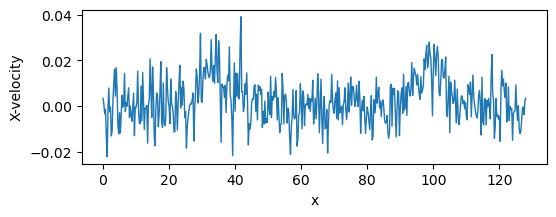

In [15]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')

The data obtained from the **PHARE** simlulation are too noisy so that the peaks can not easily be found. We then create a new patch hierarchy as a deepcopy of the former one, but for which all the dataset are smoothed using a Gaussian filter. This one is then the Gaussian filter of `pyphare`.

In [16]:
v = gF(V, sigma=6)

We then use a `find_peaks` version of `pyphare`, called `peaksIds` to find the peaks (using the same syntax and format as the method of `scipy`)

In [17]:
pks, hgs = peakIds(v, names=['x',], height=0.015)

{'peak_heights': array([0.01741001])} [0.01741001]
{'peak_heights': array([0.01624167])} [0.01624167]


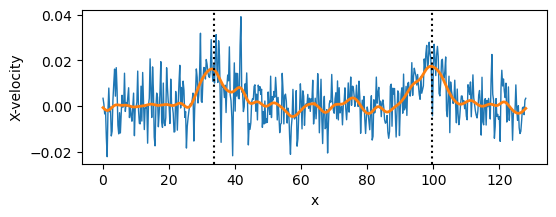

In [18]:
fig, ax = plt.subplots(figsize=(6,2))

V.plot(qty='x', ax=ax, ls='solid', lw=1.0, color='tab:blue', ylabel='X-velocity')
v.plot(qty='x', ax=ax, ls='solid', lw=2.0, color='tab:orange', ylabel='X-velocity')
for p in pks:
    ax.axvline(x=p, color='black', linestyle='dotted')

You can then do the job for a set of times to investigate how the small perturbation is propagating

{'peak_heights': array([0.02993506])} [0.02993506]
{'peak_heights': array([0.02869911])} [0.02869911]
{'peak_heights': array([0.02322719])} [0.02322719]
{'peak_heights': array([0.02180079])} [0.02180079]
{'peak_heights': array([0.01634747])} [0.01634747]
{'peak_heights': array([0.02042103])} [0.02042103]
{'peak_heights': array([0.01741001])} [0.01741001]
{'peak_heights': array([0.01624167])} [0.01624167]
{'peak_heights': array([0.01559797])} [0.01559797]
{'peak_heights': array([0.01633604])} [0.01633604]


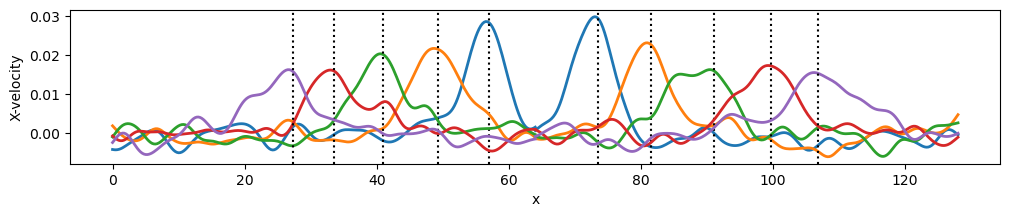

In [19]:
fig, ax = plt.subplots(figsize=(12,2))

pks_plus = []
pks_minus = []
hgs_plus = []
hgs_minus = []

for i, time in enumerate(times):
    V = run.GetVi(time)
    v = gF(V, sigma=6)
    pks, hgs = peakIds(v, names=['x',], height=0.0135, distance=20)

    pks_minus.append(pks[1])
    pks_plus.append(pks[0])
    hgs_minus.append(hgs[1])
    hgs_plus.append(hgs[0])

    v.plot(qty='x', ax=ax, ls='solid', lw=2.0, color=colors[i], ylabel='X-velocity')

    for p in pks:
        ax.axvline(x=p, color='black', linestyle='dotted')

Text(0, 0.5, 'X-position')

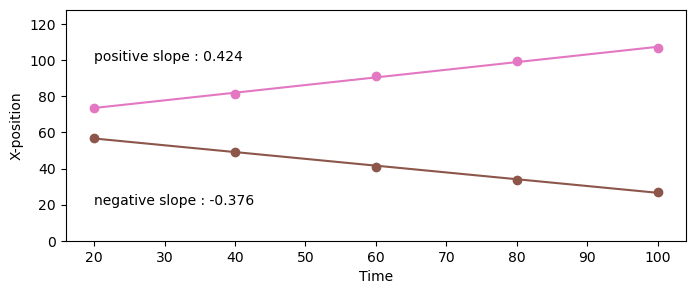

In [20]:
fig, ax = plt.subplots(figsize=(8,3))

ax.plot(times, pks_minus, marker="o", color=colors[5], ls="None")
slope_m, origin_m = polyfit(times, pks_minus, 1)
ax.plot(times, times*slope_m+origin_m, color=colors[5])

ax.plot(times, pks_plus, marker="o", color=colors[6], ls="None")
slope_p, origin_p = polyfit(times, pks_plus, 1)
ax.plot(times, times*slope_p+origin_p, color=colors[6])

ax.text(20, 100, 'positive slope : {:.3f}'.format(slope_p))
ax.text(20, 20, 'negative slope : {:.3f}'.format(slope_m))

ax.set_ylim([0, 128])
ax.set_xlabel('Time')
ax.set_ylabel('X-position')

In [21]:
v_phi = np.mean(np.abs([slope_m, slope_p]))
print('phase velocity of the mode : {:.3f}'.format(v_phi))

phase velocity of the mode : 0.400


In [22]:
Gamma_e = 1
Gamma_i = 3
print("ion acoustic speed : ", np.sqrt(Gamma_e*Te+Gamma_i*Ti))

ion acoustic speed :  0.4


In [23]:
from scipy import odr

def model_fn(p, x):
    a, b, c = p
    return a+b*np.exp(c*x)
model = odr.Model(model_fn)

x = times
model = odr.Model(model_fn)

y = hgs_minus
data = odr.Data(x, y)
odr_obj = odr.ODR(data, model, beta0=[0.01,0.01,0.01])
out_minus = odr_obj.run()
# out_minus.pprint()
b0, b1, b2 = out_minus.beta

y = hgs_plus
odr_obj = odr.ODR(odr.Data(x, y), model, beta0=[0.001,0.001,0.001])
out_plus = odr_obj.run()
# out_plus.pprint()
B0, B1, B2 = out_plus.beta

print("growth rate for the minus side : ", b2)
print("growth rate for the plus side : ", B2)

growth rate for the minus side :  -0.028482997318693692
growth rate for the plus side :  -0.03741099535406955


Text(0, 0.5, 'Amplitude')

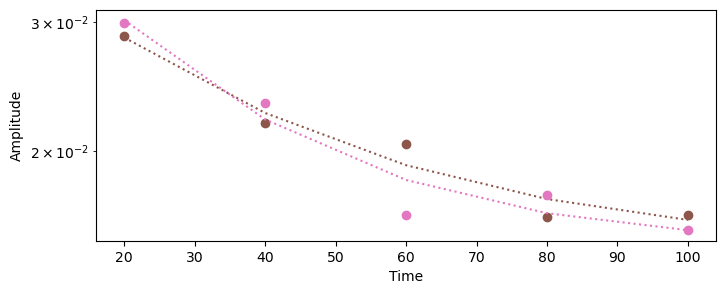

In [24]:
fig, ax = plt.subplots(figsize=(8,3))

ax.semilogy(times, hgs_minus, marker="o", color=colors[5], ls="None")
ax.semilogy(times, model_fn(out_minus.beta, times), color=colors[5], ls=":")

ax.semilogy(times, hgs_plus, marker="o", color=colors[6], ls="None")
ax.semilogy(times, model_fn(out_plus.beta, times), color=colors[6], ls=":")

ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')

In fact, even in the collisionless situation where the particles are essentially free streaming the behavior of the system is very similar to the ﬂuid (collisional) case, showing a density "hole" moving to the left and a density "bump" moving to the right, both associated with a positive velocity bump. A picture of the evolution of the particles in ($x, v_x$) phase space for the hybrid case is shown in the next ﬁgure

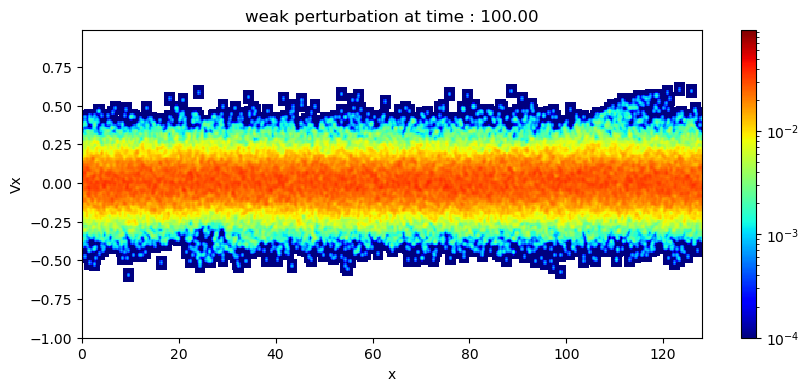

In [25]:
time=100
r = Run(run_path)
ions = r.GetParticles(time, ["protons",])

fig, ax = plt.subplots(figsize=(10,4))

p,f = ions.dist_plot(axis=("x", "Vx"),
                     ax=ax,
                     norm = 0.4,
                     finest=True,
                     gaussian_filter_sigma=1,
                     vmin=-1,vmax=1,
                     dv=0.01,
                     title="weak perturbation at time : {:.2f}".format(time),
                    )

# FAIRE UN DIST_PLOT AVEC DES POINTS, PAS DES BINS DE COULEUR

 ## Theory

The velocity of a singly charged ion (charge $+e$, mass $m$) in the $x$ direction, i.e. along the magnetic ﬁeld, changes under the eﬀect of an the electric ﬁeld component $E_x$ :
$$
\frac{\mathrm{d} v_x}{\mathrm{d}t} = \frac{e}{m} E_x(x; t)
$$

In the hybrid approximation where $n = n_i \sim n_e$ and the mass of electron is zero, the electrostatic ﬁeld $E$ can be written as (a reduced version of Ohm's law):

$$
E_x = - \frac{1}{e n_e} \frac{\partial p_e}{\partial x}
$$

where $p_e = n T_e$. The first two ﬂuid equations describing the ions' motion can therefore be written as :
\begin{eqnarray}
\partial_t n & = & - \partial_x (n u) \\
\partial_t u & = & - u \partial_x u - (1/n) \partial_x p
\end{eqnarray}

where the pressure $p$ is intended to represent the $p_{xx}$ component of the pressure tensor.
A simple energy equation similar to the one of the fluid case is not easily written in this case as electrons and protons may behave very diﬀerently.
The modes phase velocity may therefore depend on various parameters including the mode's wavelength.
In the limit $p_i \ll p_e$ a propagating mode exists which is reminiscent of the standard sound mode with a phase velocity $v_{\phi} = \sqrt{\gamma_e T_e + \gamma_i T_i}$ where $\gamma_e = 1$ in the isothermal case and $\gamma_i = 3$ in the adiabatic monodimensional case.
Given the above ﬂuid equations, the relations for the eigenmodes are those of the standard sound mode:
$$
\frac{u_1}{v_{\phi}} = \frac{n_1}{n_0} = \frac{1}{\gamma} \frac{p_1}{p_0}
$$

## Sample of questions

1. How can a positive velocity bump move with a negative phase velocity (i.e. to the left) ?
2. Measure the propagation velocity of the perturbations in the ﬂuid and hybrid simulations and compare to the sound velocity
3. Can you explain the ﬂuid behavior of the hybrid system (i.e. the propagation of a quasi-sound wave) by observing the motion of the particles ?